In [2]:
_author_ = "Rahul_Chowdhury"
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import sys
print(sys.version)

3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


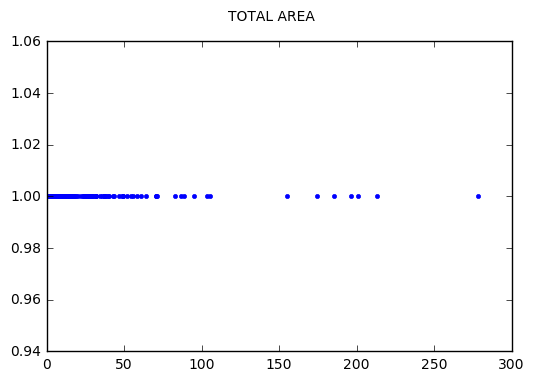

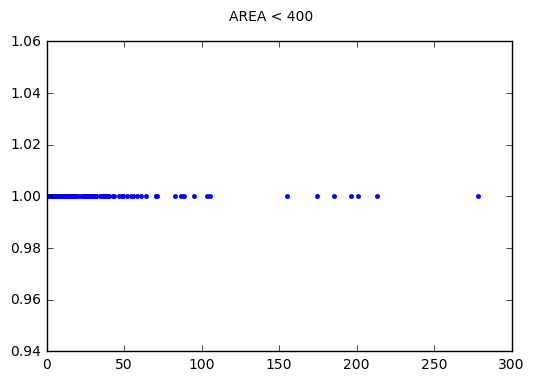

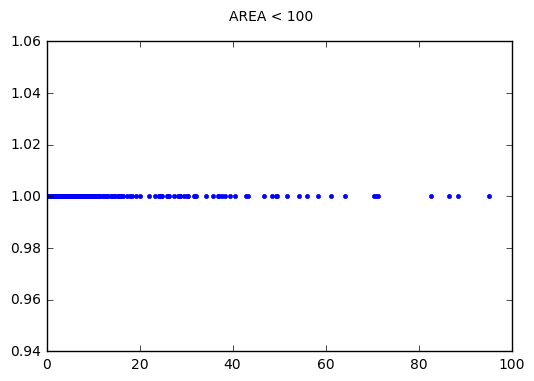

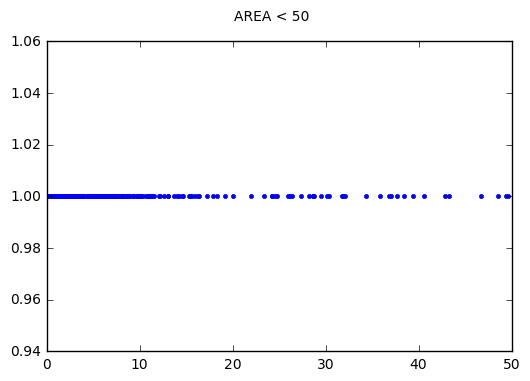

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [6]:
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
data = pd.read_csv("data-folder/forestfires.csv")
mp.plot(data['area'],len(data['area']) * [1], ".")
mp.suptitle("TOTAL AREA")
mp.show()

area_less_than_400 = data[data['area']<400]
mp.plot(area_less_than_400['area'],len(area_less_than_400['area']) * [1], ".")
mp.suptitle("AREA < 400")
mp.show()

area_less_than_100 = data[data['area']<100]
mp.plot(area_less_than_100['area'],len(area_less_than_100['area']) * [1], ".")
mp.suptitle("AREA < 100")
mp.show()

area_less_than_50 = data[data['area']<50]
mp.plot(area_less_than_50['area'],len(area_less_than_50['area']) * [1], ".")
mp.suptitle("AREA < 50")
mp.show()

#data = data.drop(data.columns[[12]], axis = 1)
data.head(10)

In [7]:
#converting month and day attribute to numerical attribute
month_dict = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
day_dict = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5,"sat":6,"sun":7}
data['month'] = data['month'].map(month_dict) #mapping it to month_dictionary
data['day'] = data['day'].map(day_dict) #mapping it to day_dictionary
data.head(100)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [15]:
#binning of decision attribute
classes = [1,2,3,4,5]
bins = [-1,20,40,80,120,300]
data['class'] = pd.cut(data['area'], bins, labels = classes)
data.head(500)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,class
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,1
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,1
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,1
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,1
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,1


In [12]:
#dropping decision variable
data = data.drop(data.columns[12], axis = 1)
#calculating neighborhood for all numerical attributes: FFMC, DMC, DC, ISI, TEMP, RH

for col1 in data:
    
        if(col1 == 'FFMC' or col1 == 'DMC' or col1 == 'DC' or  col1 == 'ISI' or col1 == 'TEMP' or col1 == 'RH'):
       
            if(col1 == 'FFMC'):
                threshold = 3
                neighborhood_class_dict_FMC = {}
                for index, row in data.iterrows():
                            neighbor_list = []
                            for index1, row1 in data.iterrows():
                                if((row['V0'] > row1['V0'])):
                                    if(row['V0'] - row1['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                elif(row['V0'] < row1['V0']):
                                    if(row1['V0'] - row['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                else:        
                                    neighbor_list.append(index1)
                            neighborhood_class_dict_FFMC[index] = neighbor_list
            elif(col1 == 'DMC'):
                threshold = 3
                neighborhood_class_dict_DMC = {}
                for index, row in data.iterrows():
                            neighbor_list = []
                            for index1, row1 in data.iterrows():
                                if((row['V0'] > row1['V0'])):
                                    if(row['V0'] - row1['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                elif(row['V0'] < row1['V0']):
                                    if(row1['V0'] - row['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                else:        
                                    neighbor_list.append(index1)
                            neighborhood_class_dict_DMC[index] = neighbor_list
                
            elif(col1 == 'DC'):
                threshold = 3
                neighborhood_class_dict_DC = {}
                for index, row in data.iterrows():
                            neighbor_list = []
                            for index1, row1 in data.iterrows():
                                if((row['V0'] > row1['V0'])):
                                    if(row['V0'] - row1['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                elif(row['V0'] < row1['V0']):
                                    if(row1['V0'] - row['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                else:        
                                    neighbor_list.append(index1)
                            neighborhood_class_dict_DC[index] = neighbor_list
            elif(col1 == 'ISI'):
                threshold = 0.5
                neighborhood_class_dict_ISI = {}
                for index, row in data.iterrows():
                            neighbor_list = []
                            for index1, row1 in data.iterrows():
                                if((row['V0'] > row1['V0'])):
                                    if(row['V0'] - row1['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                elif(row['V0'] < row1['V0']):
                                    if(row1['V0'] - row['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                else:        
                                    neighbor_list.append(index1)
                            neighborhood_class_dict_ISI[index] = neighbor_list
            elif(col1 == 'TEMP'):
                threshold = 2
                neighborhood_class_dict_TEMP = {}
                for index, row in data.iterrows():
                            neighbor_list = []
                            for index1, row1 in data.iterrows():
                                if((row['V0'] > row1['V0'])):
                                    if(row['V0'] - row1['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                elif(row['V0'] < row1['V0']):
                                    if(row1['V0'] - row['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                else:        
                                    neighbor_list.append(index1)
                            neighborhood_class_dict_TEMP[index] = neighbor_list
            else:
                threshold = 3
                neighborhood_class_dict_RH = {}
                for index, row in data.iterrows():
                            neighbor_list = []
                            for index1, row1 in data.iterrows():
                                if((row['V0'] > row1['V0'])):
                                    if(row['V0'] - row1['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                elif(row['V0'] < row1['V0']):
                                    if(row1['V0'] - row['V0'] <= threshold):
                                        neighbor_list.append(index1)
                                else:        
                                    neighbor_list.append(index1)
                            neighborhood_class_dict_RH[index] = neighbor_list

            

IndexError: index 12 is out of bounds for axis 0 with size 12

In [ ]:

cluster2_numerical_global = [] #global variable

def MMeR(U,k):
    C =  {}#the clusters made through MMeR alogrithm
    C_distance = {}
    Rough_Data = U.copy()
    index = 0
   
    while(2>len(C.keys())):
         
        split_attr,min_roughness_attr_value = mmer_roughness(Rough_Data)
        print(split_attr)
        #min_roughness_attr_value = min(roughness_list_dict[split_attr]) #find the min. value of min_roughness_attr for which alpha is minimum
        #print(min_roughness_attr_value)
        if(split_attr == 'FFMC' || split_attr == 'DMC' || split_attr == 'DC'|| split_attr == 'ISI'|| split_attr == 'TEMP'|| split_attr == 'RH'):
            cluster1 = cluster1_numerical_global
            #print("split-cluster1",cluster1 )
            cluster2 = cluster2_numerical_global
            #print("split-cluster2",cluster2 )
        else:    
            cluster1 = Rough_Data[Rough_Data[split_attr] == min_roughness_attr_value].index.tolist()
            cluster2 = Rough_Data.loc[Rough_Data[split_attr] != min_roughness_attr_value].index.tolist()
            
        cluster1_distance = cluster_distance(cluster1, Data) #calculating the cluster distance of cluster1
        cluster2_distance = cluster_distance(cluster2, Data) #calculating the cluster distance of cluster2
        C[index] = cluster1
        C_distance[index] = cluster1_distance
        index += 1
        C[index] = cluster2
        C_distance[index] = cluster2_distance
        index += 1
        max_index = max(C_distance, key= C_distance.get) #find the index with the max cluster distance
        
              
        Rough_Data = U.ix[C[max_index]]  #send data of cluster with max distance
        for key in C:
            print("Cluster",C[key])
            print("Cluster distance", C_distance[key])
      
        
        if(len(C.keys())!= (k-1)):
               
            del C[max_index]
            del C_distance[max_index]
        
        print("C length:",len(C.keys()))
       
        
        
    


    
    
def roughness(col_name1, col_name2, val, Data):
     
     equiv_class_dict = {} #dictionary storing equiv classes for all attribute
     for col in Data:
        equiv_class_dict[col] =list(Data.groupby([col]))
        
     arr = equiv_class_dict[col_name2] #group equiv classes according to column2
     target_set = Data[Data[col_name1] == val].index.tolist() #calculating target set for each unique value in column1
     lower_approx = []
     upper_approx = []
     for name,group in arr:
       selected_list = list(group.index)
       if(set(selected_list).issubset(target_set)): #if a subset, then append to lower_approx
            lower_approx.append(selected_list)
       if(set(selected_list) & set(target_set)): #if intersection is not null, then append to upper_approx
            upper_approx.append(selected_list)
     lower_approx_count = sum(map(len, lower_approx)) #count the no. of elements in lower_approx
     upper_approx_count = sum(map(len, upper_approx))
     if(lower_approx_count == 0):
        roughness = 1
     else:   
         roughness = 1 - (lower_approx_count/upper_approx_count) # return roughness for a(i) = alpha
     return roughness

def roughness_categorical_to_numerical(neighborhood_class_dict, col_name1, col_name2, val, Data):
   
    target_set = Data[Data[col_name1] == val].index.tolist() #calculating target set for each unique value in column1
    lower_approx1 = []
    upper_approx1= []
    for k in neighborhood_class_dict:
       selected_list = neighborhood_class_dict[k]
       if(set(selected_list).issubset(target_set)): #if a subset, then append to lower_approx
            lower_approx1.append(k)
       if(set(selected_list) & set(target_set)): #if intersection is not null, then append to upper_approx
            upper_approx1.append(k)
    lower_approx_count = len(lower_approx1) #count the no. of elements in lower_approx
    upper_approx_count = len(upper_approx1)
    if(lower_approx_count == 0):
        roughness = 1
    else:   
         roughness = 1 - (lower_approx_count/upper_approx_count) # return roughness for a(i) = alpha
    return roughness

def roughness_numerical_to_categorical(neighborhood , col2_name2 , Data):
    
    target_set = neighborhood #target set will be neighbourhood of col1
    equiv_class_dict = {} #dictionary storing equiv classes for all attribute
    for col in Data:
        equiv_class_dict[col] =list(Data.groupby([col]))
        
    arr = equiv_class_dict[col2_name2] #group equiv classes according to column2
    lower_approx = []
    upper_approx = []
    for name,group in arr:
       selected_list = list(group.index)
       if(set(selected_list).issubset(target_set)): #if a subset, then append to lower_approx
            lower_approx.append(selected_list)
       if(set(selected_list) & set(target_set)): #if intersection is not null, then append to upper_approx
            upper_approx.append(selected_list)
    lower_approx_count = sum(map(len, lower_approx)) #count the no. of elements in lower_approx
    upper_approx_count = sum(map(len, upper_approx))
    if(lower_approx_count == 0):
        roughness = 1
    else:   
         roughness = 1 - (lower_approx_count/upper_approx_count) # return roughness for a(i) = alpha
    #print("roughness of numerical", roughness)
    return roughness

def roughness_numerical_to_numerical(col1, col2, Data)   
    
    
    


def cluster_distance(cluster, Data):
        distance = 0
        print("Cluster", cluster)
        Categorical_Data = Data.ix[cluster]
        Numerical_Data = Categorical_Data[['V0']]
        Categorical_Data = Categorical_Data.drop(Categorical_Data.columns[[4]], axis = 1)
        
        
        for i in range(0,len(cluster)-1): #categorical
              a = np.array(Categorical_Data.ix[cluster[i]])
              for k in range(i+1,len(cluster)):
                   b = np.array(Categorical_Data.ix[cluster[k]])
                   distance += sum(a != b)
                
        neighborhood_class_dict = {} #calculating neighborhood of numerical attr
        threshold = 10
        for index, row in Data.iterrows():
                        neighbor_list = []
                        for index1, row1 in Data.iterrows():
                            if((row['V0'] > row1['V0'])):
                                if(row['V0'] - row1['V0'] <= threshold):
                                    neighbor_list.append(index1)
                            elif(row['V0'] < row1['V0']):
                                if(row1['V0'] - row['V0'] <= threshold):
                                    neighbor_list.append(index1)
                            else:        
                                neighbor_list.append(index1)
                        neighborhood_class_dict[index] = neighbor_list
                        
        for i in range(0,len(cluster)-1): #for numerical
              a = neighborhood_class_dict[i]
              for k in range(i+1,len(cluster)):
                b = neighborhood_class_dict[k]
                if(a!= b):
                    distance += 1
        
                
        print(len(cluster))  
        final_distance = (2 * distance)/(len(cluster) * (len(cluster)-1)) 
                  
        return final_distance

def cluster_numerical(cluster1 , cluster2):
    global cluster1_numerical_global 
    cluster1_numerical_global = cluster1
    global cluster2_numerical_global
    cluster2_numerical_global = cluster2
    #print("cluster1_numerical_global", cluster1_numerical_global)
    #print("cluster2_numerical_global", cluster2_numerical_global)
   
    

    
def mmer_roughness(Data):
    #check if all columns have more than 1 unique values, if not drop that column/columns
   
    for col1 in Data:
         values_in_col_name1 =  list(Data[col1].unique()) #extracting each unique value in column1
         #print(col1, len(values_in_col_name1))
         if(len(values_in_col_name1) == 1):
            Data = Data.drop(col1, axis = 1)
            
   
    
    min_mean_roughness = {} #array to store the minimum of average of roughness of each attr
    roughness_list_dict = defaultdict(dict) #needed to use 2D dictionary 
   
    
    
    for col1 in Data:
        
        neighborhood_class_dict = {} #calculating neighborhood of numerical attr
        threshold = 10
        for index, row in Data.iterrows():
                        neighbor_list = []
                        for index1, row1 in Data.iterrows():
                            if((row['V0'] > row1['V0'])):
                                if(row['V0'] - row1['V0'] <= threshold):
                                    neighbor_list.append(index1)
                            elif(row['V0'] < row1['V0']):
                                if(row1['V0'] - row['V0'] <= threshold):
                                    neighbor_list.append(index1)
                            else:        
                                neighbor_list.append(index1)
                        neighborhood_class_dict[index] = neighbor_list
        
        if(col1 == 'FFMC' || col1 == 'DMC' || col1 == 'DC'|| col1 == 'ISI'|| col1 == 'TEMP'|| col1 == 'RH'):
            
             mean_roughness_numerical = [] 
             roughness_list_dict_numerical = {}
             for key in neighborhood_class_dict:             
                 roughness_list_numerical = [] 
                 for col2 in Data:
                    if(col1!= col2):   
                       roughness_list_numerical.append(roughness_numerical_to_categorical(neighborhood_class_dict[key], col2, Data))
                 mean_roughness_numerical.append(sum(roughness_list_numerical)/float(len(roughness_list_numerical)))
                 roughness_list_dict_numerical[key] = sum(roughness_list_numerical)/float(len(roughness_list_numerical))
                                  
             min_mean_roughness['V0'] = (min(mean_roughness_numerical))   
             min_roughness_obj =   min(roughness_list_dict_numerical, key= roughness_list_dict_numerical.get)
             l = Data.index.tolist()   
             cluster1 =  neighborhood_class_dict[min_roughness_obj]
             cluster2 =  list(set(l) - set(neighborhood_class_dict[min_roughness_obj]))
               
                
                
        values_in_col_name1 =  list(Data[col1].unique()) #extracting each unique value in column1
        mean_roughness = [] #list for mean roughness for a(i) = alpha
        for val in values_in_col_name1:
            roughness_list = [] #array of a(i) = alpha w.r.t. other columns 
            for col2 in Data:
                if(col1!= col2): #not to be compared with itself
                  if(col2 == 'V0'):
                      roughness_list.append(roughness_categorical_to_numerical(neighborhood_class_dict, col1 , col2, val, Data))
                                     
                  else:  
                      roughness_list.append(roughness(col1 , col2, val, Data))
            mean_roughness.append(sum(roughness_list)/float(len(roughness_list)))
            roughness_list_dict[col1][val] = sum(roughness_list)/float(len(roughness_list))
        min_mean_roughness[col1]=(min(mean_roughness))
    for key in min_mean_roughness:
        print(key, min_mean_roughness[key]) 
        
    min_roughness_attr = min(min_mean_roughness, key=min_mean_roughness.get) #find the attr with minimum roughness
    print(min_roughness_attr)
    if(min_roughness_attr == 'V0'):
        cluster_numerical(cluster1, cluster2)
        return 'V0', 1
    
    return min_roughness_attr, min(roughness_list_dict[min_roughness_attr])
     

    


MMeR(Data,k) 

